**Set environment**

In [90]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

In [4]:
#txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
#vec = dir(txt_fdiry)
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_REGION = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


## Import data

In [6]:
lst = lapply(VEC_TXT_REGION, function(txt_region){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, 
        "region_coverage_fcc_score", 
        txt_region, 
        "summary"
    )
    #txt_fname = "result.coverage.score.final.tsv"
    txt_fname = "region.coverage.score.fcc.final.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_fcc_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 432928     12

$fcc_astarr_macs_input_union
[1] 639718     12



Chrom,ChromStart,ChromEnd,Region,Score,Zcore,Score_Label,Zcore_Label,Assay_Name,Assay_Type,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,-2.23485265,-3.5573621,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR
chr1,14282,14614,chr1:14282-14614,0.03179044,0.0361388,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR
chr1,16025,16338,chr1:16025-16338,-1.33934060,-2.1376311,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR


In [7]:
lst = lapply(VEC_TXT_REGION, function(txt_region){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, 
        "region_coverage_fcc_score", 
        txt_region, 
        "summary"
    )
    #txt_fname = "result.coverage.score.final.tsv"
    txt_fname = "region.coverage.score.atac.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_atac_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 150041     10

$fcc_astarr_macs_input_union
[1] 246852     10



Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Assay_Name,Assay_Type,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,3.940038,Q3,STARR_ATAC_K562_Reddy_KS91,ATAC,ASTARR_KS91,ATAC
chr1,14282,14614,chr1:14282-14614,2.841707,Q2,STARR_ATAC_K562_Reddy_KS91,ATAC,ASTARR_KS91,ATAC
chr1,16025,16338,chr1:16025-16338,3.830812,Q3,STARR_ATAC_K562_Reddy_KS91,ATAC,ASTARR_KS91,ATAC


In [8]:
lst = lapply(VEC_TXT_REGION, function(txt_region){
    ### get tables
    dat_region_score_fcc_import  = lst_dat_region_score_fcc_import[[txt_region]]
    dat_region_score_atac_import = lst_dat_region_score_atac_import[[txt_region]]
    
    ### arrange tables
    vec = c("Chrom", "ChromStart", "ChromEnd", "Region", "Score", "Assay_Type")
    dat = dat_region_score_fcc_import
    dat = dat %>% dplyr::select(any_of(vec))
    dat_region_score_fcc_arrange = dat

    dat = dat_region_score_atac_import
    dat = dat %>% dplyr::select(any_of(vec))
    dat_region_score_atac_arrange = dat

    ### combine tables
    dat = bind_rows(
        dat_region_score_fcc_arrange,
        dat_region_score_atac_arrange
    )
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 582969      6

$fcc_astarr_macs_input_union
[1] 886570      6



Chrom,ChromStart,ChromEnd,Region,Score,Assay_Type
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chr1,10038,10405,chr1:10038-10405,-2.23485265,ASTARR
chr1,14282,14614,chr1:14282-14614,0.03179044,ASTARR
chr1,16025,16338,chr1:16025-16338,-1.33934060,ASTARR


In [9]:
lst = lst_dat_region_score_import 
dat = lst[["fcc_astarr_macs_input_union"]]
table(dat$Assay_Type,dat$Assay_Type)

                
                 ASTARR   ATAC CRISPRi-Growth CRISPRi-HCRFF  LMPRA  TMPRA
  ASTARR         246850      0              0             0      0      0
  ATAC                0 246852              0             0      0      0
  CRISPRi-Growth      0      0          80288             0      0      0
  CRISPRi-HCRFF       0      0              0          1330      0      0
  LMPRA               0      0              0             0  68497      0
  TMPRA               0      0              0             0      0   1722
  WSTARR              0      0              0             0      0      0
                
                 WSTARR
  ASTARR              0
  ATAC                0
  CRISPRi-Growth      0
  CRISPRi-HCRFF       0
  LMPRA               0
  TMPRA               0
  WSTARR         241031

In [10]:
vec = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "ATAC")
lst = lst_dat_region_score_import 
dat = lst[["fcc_astarr_macs_input_union"]]
dat = dat %>% dplyr::filter(Assay_Type %in% vec)
res = table(dat$Assay_Type)
print(res)


ASTARR   ATAC  LMPRA  TMPRA WSTARR 
246850 246852  68497   1722 241031 


ASTARR  LMPRA  TMPRA WSTARR 
246850  68420   1722 246688 

In [11]:
lst = lst_dat_region_score_import 
dat = lst[["fcc_astarr_macs_input_union"]]

lst = split(dat, dat$Assay_Type)
print(names(lst))
dat_region_score_crispri_hcrff  = lst[["CRISPRi-HCRFF"]]
dat_region_score_crispri_growth = lst[["CRISPRi-Growth"]]

dat = dat_region_score_crispri_hcrff
print(dim(dat))

dat = dat_region_score_crispri_growth
print(dim(dat))

[1] "ASTARR"         "ATAC"           "CRISPRi-Growth" "CRISPRi-HCRFF" 
[5] "LMPRA"          "TMPRA"          "WSTARR"        
[1] 1330    6
[1] 80288     6


In [87]:
lst = lst_dat_region_score
dat = lst[[txt_assay_crispr]]

vec = dat$Score
vec = abs(vec)
vec_num_score = vec

num_hit_rate = 0.05
num_cutoff = quantile(vec_num_score, probs = 1 - num_hit_rate)
print(num_cutoff)

dat$Group = ifelse(vec_num_score >= num_cutoff, 1, 0)
dat = dat %>% dplyr::select(Region, Group)


dat_region_group = dat
print(dim(dat))
fun_display_table(head(dat, 3))

      95% 
0.4836082 
[1] 1330    2


Region,Group
chr11:4092104-4092566,0
chr11:4094204-4095676,0
chr11:4144511-4147030,0


In [39]:
fun_auroc2 = function(vec_boo_group, vec_num_score) {
  # 1) Sort ascending by score
  idx = order(vec_num_score)
  grp = vec_boo_group[idx]

  total_pos = sum(grp)
  total_neg = sum(!grp)
  if (total_pos == 0 || total_neg == 0) {
    stop("Need at least one TRUE and one FALSE")
  }

  # 2) At each unique score threshold, compute TPR & FPR
  #    positives above threshold = total_pos - cumsum(grp)
  #    negatives above threshold = total_neg - cumsum(!grp)
  tpr = (total_pos - cumsum(grp)) / total_pos
  fpr = (total_neg - cumsum(!grp)) / total_neg

  # 3) Add the endpoints (0,0) and (1,1)
  tpr = c(0, tpr, 1)
  fpr = c(0, fpr, 1)

  # 4) Compute AUROC by trapezoidal rule
  d_fpr   = diff(fpr)
  avg_tpr = (tpr[-1] + tpr[-length(tpr)]) / 2
  auc     = sum(avg_tpr * d_fpr)

  list(
    Sensitivity = tpr,
    FPR         = fpr,
    AUROC       = auc
  )
}

In [51]:
fun_auroc = function(vec_boo_group, vec_num_score) {
    ###
    idx = order(vec_num_score)
    vec = vec_boo_group[idx]
    vec_group = vec

    ###
    num_total_pos = sum( vec_group)
    num_total_neg = sum(!vec_group)
    if (num_total_pos == 0 || num_total_neg == 0) {
        stop("Need at least one TRUE and one FALSE")
    }
    
    ###
    vec_num_tpr = (num_total_pos - cumsum( vec_group)) / num_total_pos
    vec_num_fpr = (num_total_neg - cumsum(!vec_group)) / num_total_neg

    vec_num_sens = vec_num_tpr
    vec_num_spec = 1 - vec_num_fpr
    
    ###
    num_width = diff(c(0, 1 - vec_num_sens))
    num_auc   = sum(vec_num_spec * num_width)

    ### 
    lst = list(
        "Sensitivity" = vec_num_sens,
        "Specificity" = vec_num_spec,
        "AUROC"       = num_auc
    )
    return(lst)
}

In [62]:
fun_auprc = function(vec_boo_group, vec_num_score) {
    ###
    idx = order(vec_num_score, decreasing = TRUE)
    vec = vec_boo_group[idx]
    vec_boo_group_sorted = vec

    ###
    num_total_pos = sum( vec_boo_group_sorted)
    num_total_neg = sum(!vec_boo_group_sorted)
    if (num_total_pos == 0 || num_total_neg == 0) {
        stop("Need at least one TRUE and one FALSE")
    }

    ###
    vec_num_cum_tp = cumsum( vec_boo_group_sorted)
    vec_num_cum_fp = cumsum(!vec_boo_group_sorted)
    
    ###
    vec_num_recall    = vec_num_cum_tp / num_total_pos
    vec_num_precision = vec_num_cum_tp / (vec_num_cum_tp + vec_num_cum_fp)

    vec_num_recall    = c(0, vec_num_recall)
    vec_num_precision = c(1, vec_num_precision)
    
    ###
    lst = list(
        "Recall"    = vec_num_recall,
        "Precision" = vec_num_precision
    )
    return(lst)
}

In [83]:
fun_auprc2 = function(vec_boo_group, vec_num_score) {
  # 1) Order by decreasing score
  idx = order(vec_num_score, decreasing = TRUE)
  grp = vec_boo_group[idx]

  # 2) Totals
  total_pos = sum(grp)
  total_neg = sum(!grp)
  if (total_pos == 0 || total_neg == 0) {
    stop("Need at least one TRUE and one FALSE")
  }

  # 3) Cumulative TP and FP as we lower the threshold
  cum_tp = cumsum(grp)
  cum_fp = cumsum(!grp)

  # 4) Recall and Precision at each step
  recall    = cum_tp / total_pos
  precision = cum_tp / (cum_tp + cum_fp)

  # 5) Prepend the (0,1) point for a complete curve
  recall    = c(0, recall)
  precision = c(1, precision)

  # 6) (Optional) Compute AUPRC by trapezoidal rule
  d_rec   = diff(recall)
  avg_prec = (precision[-1] + precision[-length(precision)])/2
  auprc   = sum(avg_prec * d_rec)

  list(
    Recall    = recall,
    Precision = precision,
    AUPRC     = auprc
  )
}

In [88]:
lst = lst_dat_region_score

lst = lapply(vec_txt_assay, function(txt_assay){
    ###
    dat = lst[[txt_assay]]
    dat = dat %>% dplyr::select(Region, Score)
    dat_region_score = dat

    ###
    dat = dplyr::inner_join(
        dat_region_group,
        dat_region_score,
        by = "Region"
    )
    dat_region_merge = dat

    ###
    dat = dat_region_merge
    fit = glm(Group ~ Score, data = dat, family = "binomial")
    vec_boo_group = (dat$Group == 1)
    vec_num_score = predict(fit, type = "response")

    ###
    #lst = fun_auroc(vec_boo_group, vec_num_score)
    #vec_num_spec = lst[["Specificity"]]
    #vec_num_sens = lst[["Sensitivity"]]
    #num_auroc    = lst[["AUROC"]]

    lst = fun_auprc2(vec_boo_group, vec_num_score)
    vec_num_recall    = lst[["Recall"]]
    vec_num_precision = lst[["Precision"]]
    num_auprc    = lst[["AUPRC"]]

    ###
    txt_title = paste0("(", round(num_auprc, 2), ")")
    txt_title = paste(txt_assay, txt_title)

    ###
    dat = data.frame(
          x       = vec_num_recall,   # FPR
          y       = vec_num_precision,       # TPR
          Assay   = txt_assay,
          AUPRC  = num_auprc,
          "Performance" = txt_title,
          stringsAsFactors = FALSE
        )
    dat = dat %>% dplyr::arrange(x, y)
    return(dat)
})
dat = bind_rows(lst)

###
dat_assay_auroc = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 5324    5


x,y,Assay,AUPRC,Performance
0.0000000,1.0000000,ASTARR,0.1154789,ASTARR (0.12)
0.0149254,0.2500000,ASTARR,0.1154789,ASTARR (0.12)
0.0149254,0.3333333,ASTARR,0.1154789,ASTARR (0.12)


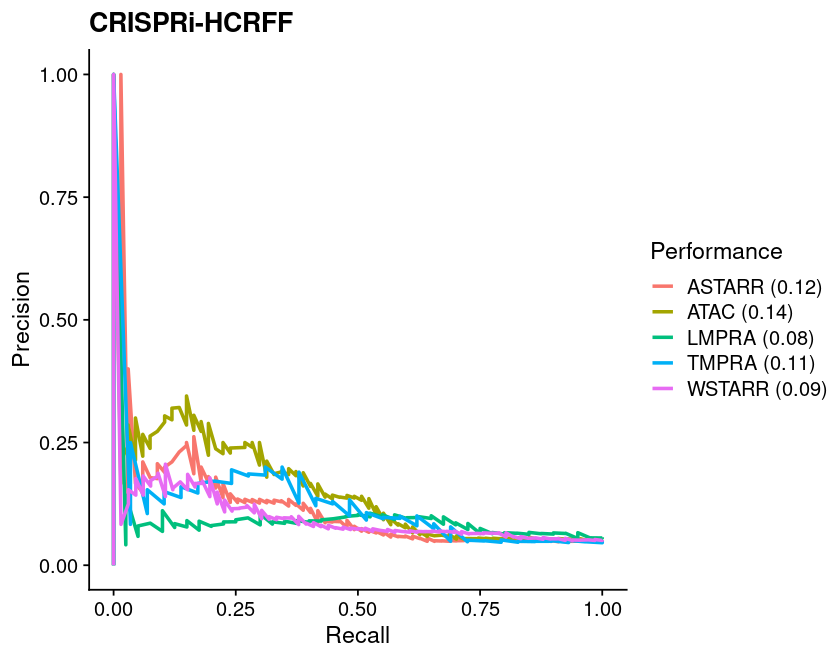

In [89]:
dat = dat_assay_auroc
gpt = ggplot(dat, aes(x=x, y=y, group=Assay, color=Performance)) +
    geom_line(linewidth=1) +
    #geom_point() +
    labs(x = "Recall", y = "Precision", title="CRISPRi-HCRFF") +
    theme_cowplot()

options(repr.plot.width=7, repr.plot.height=5.5)
print(gpt)

In [72]:
lst = lst_dat_region_score
txt_assay = "WSTARR"

dat = lst[[txt_assay]]
dat = dat %>% dplyr::select(Region, Score)
dat_region_score = dat
head(dat)

Region,Score
<chr>,<dbl>
chr1:17237-17772,-0.5529035
chr1:137737-139544,0.7581450
chr1:180982-182087,0.1910327
chr1:183239-184602,0.0828976
chr1:186238-187159,-0.1395572
chr1:191188-191739,0.0121358


In [73]:
dat = dplyr::inner_join(
        dat_region_group,
        dat_region_score,
        by = "Region"
    )
    dat_region_merge = dat

In [74]:
dat = dat_region_merge
fit = glm(Group ~ Score, data = dat, family = "binomial")
vec_boo_group = (dat$Group == 1)
vec_num_score = predict(fit, type = "response")

In [12]:
fun_auroc = function(vec_boo_group, vec_num_score) {
    ###
    idx = order(vec_num_score)
    vec = vec_boo_group[idx]
    
    ###
    vec_num_sens = (sum(vec) - cumsum(vec))/sum(vec)
    vec_num_spec = cumsum(!vec)/sum(!vec)
    
    ###
    num_width = diff(c(0, 1 - vec_num_sens))
    num_auc   = sum(vec_num_spec * num_width)

    ### 
    lst = list(
        "Specificity" = vec_num_spec,
        "Sensitivity" = vec_num_sens,
        "AUROC"       = num_auc
    )
    return(lst)
}

In [13]:
lst = lst_dat_region_score_import 
dat = lst[["fcc_astarr_macs_input_union"]]
dat_region_score_import = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 886570      6


Chrom,ChromStart,ChromEnd,Region,Score,Assay_Type
chr1,10015,10442,chr1:10015-10442,-2.1177891,ASTARR
chr1,14253,14645,chr1:14253-14645,0.3206124,ASTARR
chr1,16015,16477,chr1:16015-16477,-1.1744478,ASTARR


In [14]:
txt_assay_crispr = "CRISPRi-HCRFF"
vec_txt_assay = c("ASTARR", "WSTARR", "LMPRA", "TMPRA", "ATAC")

In [15]:
dat = dat_region_score_import
lst = split(dat, dat$Assay_Type)

lst_dat_region_score = lst

In [76]:
lst = lst_dat_region_score
dat = lst[[txt_assay_crispr]]

vec = dat$Score
vec = abs(vec)
vec_num_score = vec

num_hit_rate = 0.1
num_cutoff = quantile(vec_num_score, probs = 1 - num_hit_rate)
print(num_cutoff)

dat$Group = ifelse(vec_num_score >= num_cutoff, 1, 0)
dat = dat %>% dplyr::select(Region, Group)


dat_region_group = dat
print(dim(dat))
fun_display_table(head(dat, 3))

      90% 
0.2834525 
[1] 1330    2


Region,Group
chr11:4092104-4092566,0
chr11:4094204-4095676,0
chr11:4144511-4147030,0


In [68]:
lst = lst_dat_region_score

dat = lst[[txt_assay_crispr]]
dat = dat %>% 
    dplyr::mutate(
        Group = ifelse(abs(Score) >= 1, 1, 0)
    ) %>%
    dplyr::select(Region, Group)

dat_region_group = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 1330    2


Region,Group
chr11:4092104-4092566,0
chr11:4094204-4095676,0
chr11:4144511-4147030,0


In [52]:
lst = lst_dat_region_score

lst = lapply(vec_txt_assay, function(txt_assay){
    ###
    dat = lst[[txt_assay]]
    dat = dat %>% dplyr::select(Region, Score)
    dat_region_score = dat

    ###
    dat = dplyr::inner_join(
        dat_region_group,
        dat_region_score,
        by = "Region"
    )
    dat_region_merge = dat

    ###
    dat = dat_region_merge
    fit = glm(Group ~ Score, data = dat, family = "binomial")
    vec_boo_group = (dat$Group == 1)
    vec_num_score = predict(fit, type = "response")

    ###
    lst = fun_auroc(vec_boo_group, vec_num_score)
    vec_num_spec = lst[["Specificity"]]
    vec_num_sens = lst[["Sensitivity"]]
    num_auroc    = lst[["AUROC"]]

    ###
    txt_title = paste0("(", round(num_auroc, 2), ")")
    txt_title = paste(txt_assay, txt_title)

    ###
    dat = data.frame(
          x       = 1 - vec_num_spec,   # FPR
          y       = vec_num_sens,       # TPR
          Assay   = txt_assay,
          AUROC   = num_auroc,
        "Performance" = txt_title,
          stringsAsFactors = FALSE
        )
    dat = dat %>% dplyr::arrange(x, y)
    return(dat)
})
dat = bind_rows(lst)

###
dat_assay_auroc = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 5319    5


x,y,Assay,AUROC,Performance
0.0000000,0.0000000,ASTARR,0.7120522,ASTARR (0.71)
0.0000000,0.0434783,ASTARR,0.7120522,ASTARR (0.71)
0.0007651,0.0434783,ASTARR,0.7120522,ASTARR (0.71)


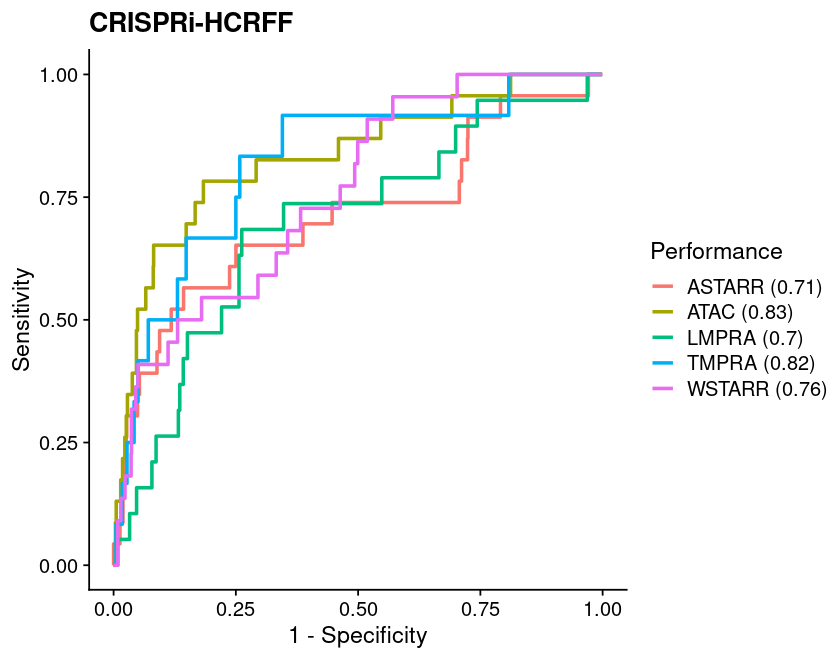

In [53]:
dat = dat_assay_auroc
gpt = ggplot(dat, aes(x=x, y=y, group=Assay, color=Performance)) +
    geom_line(linewidth=1) +
    #geom_point() +
    labs(x = "1 - Specificity", y = "Sensitivity", title="CRISPRi-HCRFF") +
    theme_cowplot()

options(repr.plot.width=7, repr.plot.height=5.5)
print(gpt)

In [75]:
prevalence <- mean(vec_boo_group)
message("Positive prevalence: ", prevalence)

Positive prevalence: 0.0168453292496172



In [42]:
lst = lst_dat_region_score

lst = lapply(vec_txt_assay, function(txt_assay){
    ###
    dat = lst[[txt_assay]]
    dat = dat %>% dplyr::select(Region, Score)
    dat_region_score = dat

    ###
    dat = dplyr::inner_join(
        dat_region_group,
        dat_region_score,
        by = "Region"
    )
    dat_region_merge = dat

    ###
    dat = dat_region_merge
    fit = glm(Group ~ Score, data = dat, family = "binomial")
    vec_boo_group = (dat$Group == 1)
    vec_num_score = predict(fit, type = "response")

    ###
    lst = fun_auroc(vec_boo_group, vec_num_score)
    vec_num_spec = lst[["Specificity"]]
    vec_num_sens = lst[["Sensitivity"]]
    num_auroc    = lst[["AUROC"]]

    ###
    txt_title = paste0("(", round(num_auroc, 2), ")")
    txt_title = paste(txt_assay, txt_title)

    ###
    dat = data.frame(
        "x" = 1 - vec_num_spec,
        "y" = vec_num_sens,
        "Assay" = txt_assay,
        "AUROC" = num_auroc,
        "Performance" = txt_title
    )
    dat = dat %>% dplyr::arrange(x, y)
    return(dat)
})
dat = bind_rows(lst)

###
dat_assay_auroc = dat
print(dim(dat))
fun_display_table(head(dat, 3))

ERROR: Error in data.frame(x = 1 - vec_num_spec, y = vec_num_sens, Assay = txt_assay, : arguments imply differing number of rows: 0, 1332, 1


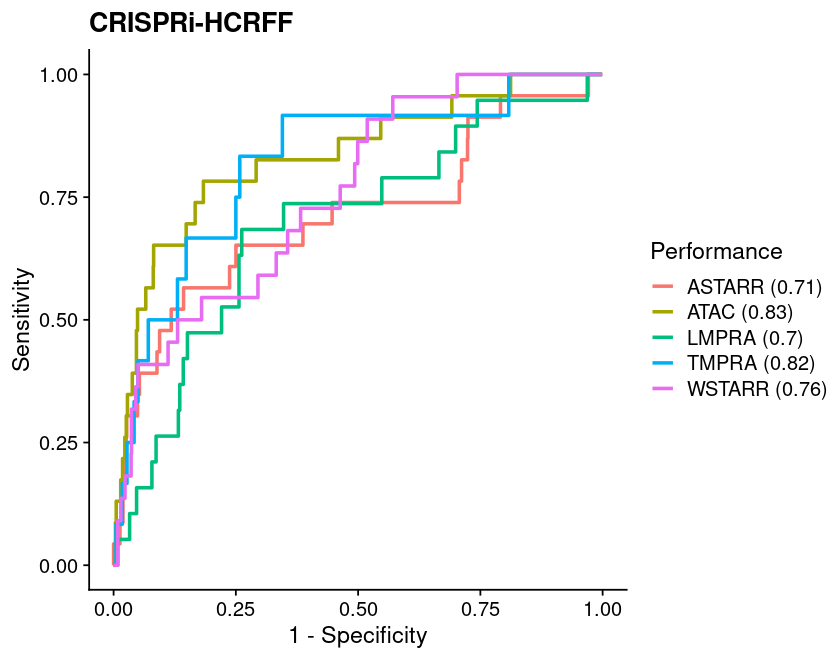

In [37]:
dat = dat_assay_auroc
gpt = ggplot(dat, aes(x=x, y=y, group=Assay, color=Performance)) +
    geom_line(linewidth=1) +
    #geom_point() +
    labs(x = "1 - Specificity", y = "Sensitivity", title="CRISPRi-HCRFF") +
    theme_cowplot()

options(repr.plot.width=7, repr.plot.height=5.5)
print(gpt)